In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

In [2]:
# import reusable functions from utils directory
sys.path.append('../../utils')
import functions

# **Cleaning Data Conclusions**

## Day 2
- `merged_final_demo_final_experiment_clients_df`

# Final Demo + Final Experiment Clients (Merged DataFrame)

In [3]:
final_demo_df = pd.read_csv('../../data/clean/merged_final_demo_final_experiment_clients_df.csv')
final_demo_df.head()

,Unnamed: 0,client_id,tenure_years,tenure_months,age,gender,accounts,balance,calls_last_6_months,logons_last_6_months,variation
0,0,836976,6,73,60,Unspecified,2,45105.30,6,9,Test
1,1,2304905,7,94,58,Unspecified,2,110860.30,6,9,Control
2,2,1439522,5,64,32,Unspecified,2,52467.79,6,9,Test
3,3,1562045,16,198,49,Male,2,67454.65,3,6,Test
4,4,5126305,12,145,33,Female,2,103671.75,0,3,Control


In [4]:
# functions.inspect_dataframe(final_demo_df)

In [5]:
functions.check_unique_and_empty(final_demo_df)

Summary of Unique and Empty Values:

                      Unique value count  Empty value count
Column                                                     
Unnamed: 0                         70594                  0
client_id                          70594                  0
tenure_years                          54                  0
tenure_months                        482                  0
age                                   84                  0
gender                                 4                  0
accounts                               8                  0
balance                            70326                  0
calls_last_6_months                    8                  0
logons_last_6_months                   9                  0
variation                              3                  0

--------------------------------------------------



### Table Overview

**Rows:**

- `client_id (int)`: A unique identifier for each client, used to distinguish one client from another in the dataset.
- `client_tenure_years (int)`: The number of years a client has been associated with the company. For example, a client with client_tenure_years = 6 has been with the company for 6 years.
- `client_tenure_months (int)`: The number of months a client has been associated with the company. This value is often more granular than client_tenure_years and could be used for more detailed analysis. For instance, a tenure of 6 years and 1 month would be represented as 73 months.
- `client_age (int)`: The age of the client in years.
- `gender`: The gender of the client. The value can be "Male," "Female," or "Unspecified," meaning the gender data is either recorded or missing.
- `num_accounts (int)`: The number of accounts the client has with the company.
- `balance (float)`: The total balance of the client's accounts with the company. This is a monetary value, and the balance can indicate how much money the client holds across their accounts.
- `calls_last_6_months (int)`: The number of calls the client has made to the company in the past six months. This can give an idea of how actively the client has engaged with the company.
- `logons_last_6_months (int)`: The number of times the client has logged into their account or interacted with the company online in the past six months.
- `variation (object)`: This column likely indicates whether the client is part of a control group or a test group for an experiment. In this case, clients are either labeled as "Test", "Control", or "Unknown".

## Day 1 & 2 (Week 5)

### **Client behavior analysis**

Answer the following questions about demographics:

- Who are the primary clients using this online process?
- Are the primary clients younger or older, new or long-standing?
- Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

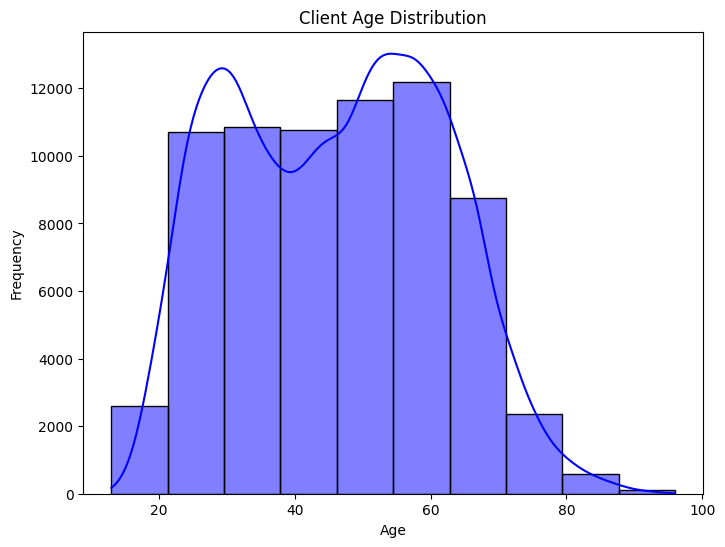

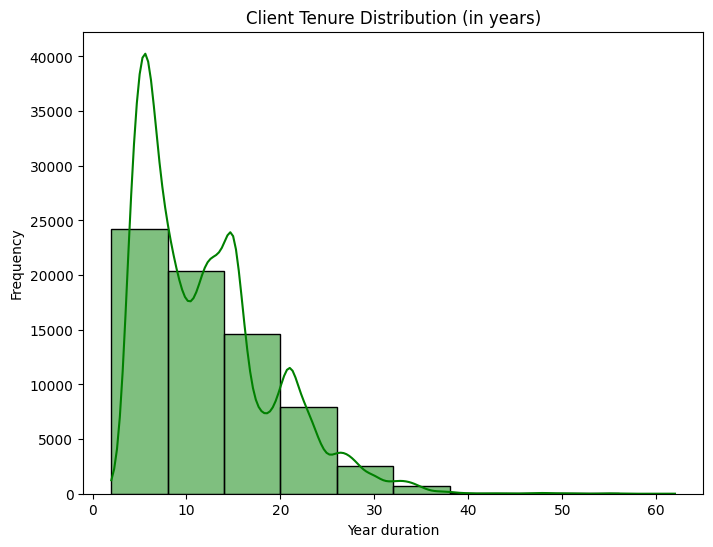

Active clients (higher logons and accounts):
Empty DataFrame
Columns: [Unnamed: 0, client_id, tenure_years, tenure_months, age, gender, accounts, balance, calls_last_6_months, logons_last_6_months, variation]
Index: []
Average client age: 46.18 years
Average client tenure: 12.05 years
Conclusion: The primary clients are generally older (above 40 years old).
Conclusion: The primary clients are generally long-standing (over 3 years).


In [7]:
# Step 1: Analyze Active Clients using the online process

# assuming active clients are those with more than 10 logons in the last 6 months and more than 3 accounts
active_clients = final_demo_df[(final_demo_df['logons_last_6_months'] > 10) & (final_demo_df['accounts'] > 3)]

# Step 2: Are the primary clients younger or older?

average_age = final_demo_df['age'].mean()

# age distribution to visualize client ages
plt.figure(figsize=(8, 6))
sns.histplot(final_demo_df['age'], kde=True, color="blue", bins=10)
plt.title('Client Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 3: Are the primary clients newer or long-standing?
# Calculate the average tenure (in years)
average_tenure = final_demo_df['tenure_years'].mean()

# Plot the tenure distribution to visualize how long clients have been with the service
plt.figure(figsize=(8, 6))
sns.histplot(final_demo_df['tenure_years'], kde=True, color='green', bins=10)
plt.title('Client Tenure Distribution (in years)')
plt.xlabel('Year duration')
plt.ylabel('Frequency')
plt.show()

# Step 4: Drawing Conclusions

# 1. Active clients using the online process
print('Active clients (higher logons and accounts):')
print(active_clients)

# 2. Average age of clients
print(f'Average client age: {average_age:.2f} years')

# 3. Average client tenure (years)
print(f'Average client tenure: {average_tenure:.2f} years')

# conclusions:
if average_age < 40:
    print('Conclusion: The primary clients are generally younger (under 40 years old).')
else:
    print('Conclusion: The primary clients are generally older (above 40 years old).')

if average_tenure < 3:
    print('Conclusion: The primary clients are generally newer (under 3 years).')
else:
    print('Conclusion: The primary clients are generally long-standing (over 3 years).')

## Day 3 (Week 5)

### **Performance Metrics**

**Success Indicators**

Discovering what key performance indicators (KPIs) will determine the success of the new design.
Use at least completion rate, time spent on each step and error rates. Add any KPIs you might find relevant.

## **KPIs - Completion Rate**
The proportion of users who reach the final `confirm` step.

**How**

- Analyzing the dataset specifically focusing on calculating the completion rate, based on the steps that clients take. We initially convert the `step` names to numerical values for easier calculation. Our code filters the rows where `step` is equal to 4 (the final step or completion of the process). `clients_finished` now contains all records of clients who completed the process.

- Using `.nunique()` we calculate the total numbers of distinct `client_id` values in the dataframe, getting the count of unique clients. With that, we calculate the number of unique clients who finished the process.

- Grouping `clients_finished` by `client_id` we count how many times each flient has completed the process. All results are stored in a new dataframe called `completion_count_df`, where `completion_count` represents the number of times each client reached step 4.

- Any `NaN` values in the `completion_count` column will be replaced by 0, indicating that these clients never completed the process.

- These new columns and data will be added to the dataframe.

### **Results**

The result *"Clients who finished the process: 47,787 out of 70,594"* provides a summary of how many clients in the dataset have successfully completed the process (reached the final step, which is step 4 in this case), compared to the total number of clients.

#### **Breaking Down the Information:**

- **Clients who finished the process (47,787):**
This number represents the clients who reached the final step (step 4) in the project or process. It's a count of how many clients successfully completed the entire journey or task.

- **Total unique clients (70,594):**
This is the total number of unique clients in the dataset. The client_id column likely represents individual clients, and nunique() is used to count how many distinct clients are in the dataset, regardless of how many steps they completed.

#### **What Can We Infer?**

The ratio of clients who finished the process to the total number of clients can be calculated as:

**Completion Rate = 47,78770,594 × 100 ≈ 67.7%**

**Completion Rate = 70,59447,787​ × 100 ≈ 67.7%**

So, about 67.7% of the clients who started the process completed it.

- **Client Drop-off:**
The remaining 32.3% of clients (i.e., 70,594 - 47,787 = 22,807) did not reach the final step. This could indicate a drop-off or abandonment rate, where clients started but didn’t finish.
Understanding the reasons for this drop-off (e.g., user experience issues, complexity, lack of incentives) could help improve the process or identify areas for intervention to increase completion rates.

- **Implications for Project Metrics:**
A 67.7% completion rate can be seen as relatively good in many contexts, especially if the process is long or involves several steps. However, in some industries or projects, you may want to aim for a higher completion rate.
If this is a metric for performance or KPIs (Key Performance Indicators), you might want to set a target (e.g., 80% completion rate) and use this data to track progress toward that goal.

#### **Potential Follow-up Analysis:**

- **Examine the Drop-off Points:**
You might want to analyze where the drop-offs occur in the steps leading up to step 4. For instance, do most clients drop off at a specific step (e.g., step 3), or is the drop-off more evenly distributed?
Investigating this can give insight into potential bottlenecks or friction points in the process.

- **Segment Clients:**
Segmenting clients by other characteristics (e.g., demographics, usage patterns, source of acquisition) could reveal if some groups are more likely to complete the process than others. This could help tailor interventions for high-value or at-risk clients.

- **Multiple Completions:**
If some clients complete the process multiple times (as might be possible in certain scenarios), this could skew the results. You could consider focusing on unique clients who completed the process at least once versus total completions.

- **Client Retention:**
If the process completion rate is tied to retention or customer loyalty (e.g., users who finish the process are more likely to stay), then this result could be a strong indicator of overall client engagement.

#### **Conclusion:**

The result shows that **approximately 67.7% of clients successfully completed the process, while about 32.3% did not**. This completion rate could be a useful KPI for understanding how effectively the project is engaging and retaining clients, as well as identifying areas for improvement in the process.


![Image Description](../../visualizations/kpi_plots/barchart_total_vs_completed_clients.png)


![Image Description](../../visualizations/kpi_plots/piechart_completion_rate_clients.png)


## **KPIs - Time Spent on Each Step**
The average duration users spend on each step.

## **KPIs - Error Rates**
If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.